# **Group: QuaCK - Quantum Computing Knights**



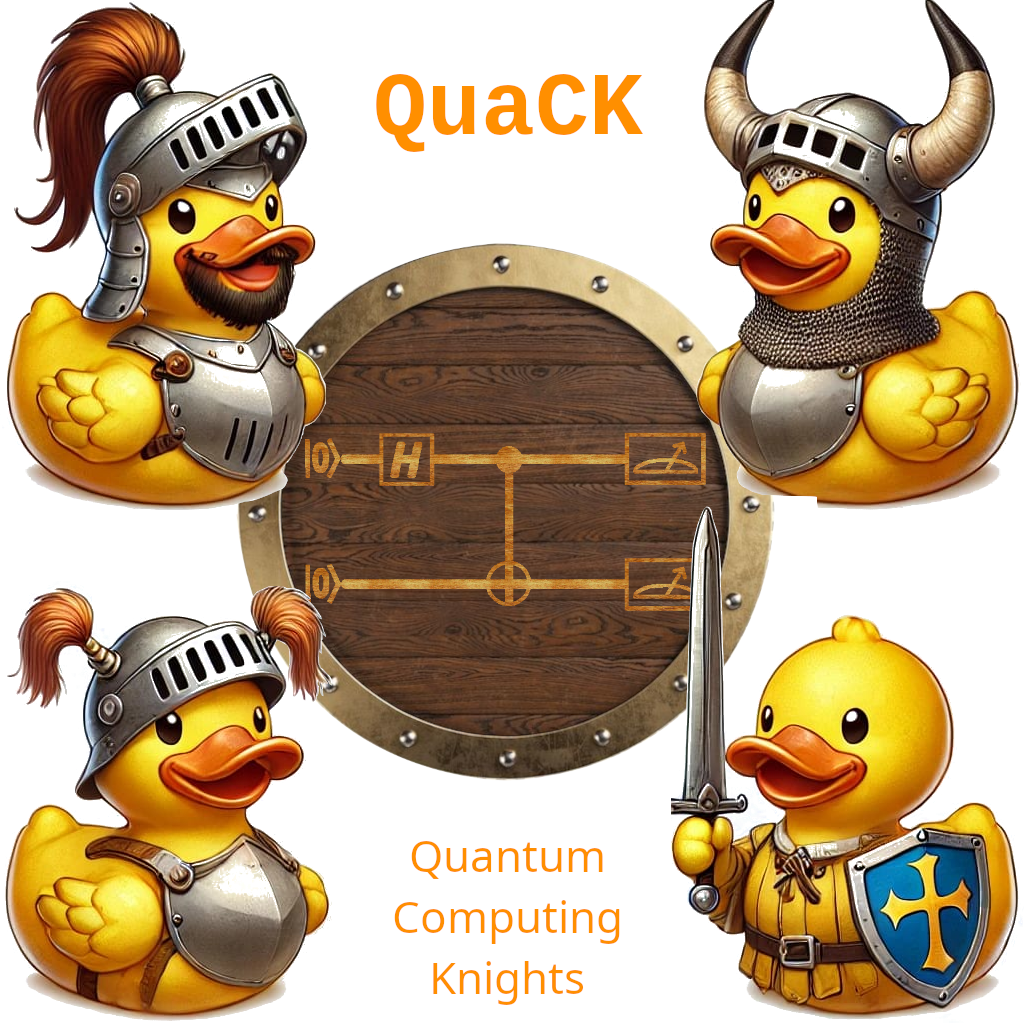

Members: Adonai Hilario da Silva, Arthur Dutra de Oliveira, Claudio Alves Pessoa Junior, Gustavo Kerdole e Ygor de Castro Lourenço

### **Challenge 1: Computational project on Bose-Einstein Condesates and the involvement in advances for new technologies**


In [ ]:
# Installing Codes
!pip install numpy

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation # to make GIF

## **Functions and initial conditions (a) and (b)**

Considering Schrodinger Equation

$i \frac{d}{dt} \Psi(x,t) = H\Psi(x,t)$,

where $H = -\frac{1}{2}\frac{d^2}{dx^2} + V(x)$ and $V(x) = \frac{1}{2}x^2$, and both initial conditions

$\Psi_a(x,0) = \left(\frac{1}{\pi}\right)^{\frac{1}{4}}e^{-\frac{x^2}{2}}$ and $\Psi_b(x,0) = \left(\frac{2}{\pi}\right)^{\frac{1}{4}}e^{-x^2}$,

we can find the respectives eigenvalues E solving Schrodinger equation.

In this way, we can find $E_a = \frac{1}{2}$ and $E_b = 1 - \frac{3}{2} x^2$, since $E_b$ depends of $x$, $\Psi_b$ is not a eigenvector and will change with time.

Now, for the interaction case, we have the Gross-Pitaevskii Equation (GPE)

$i \frac{d}{dt} \Psi(x,t) = H\Psi(x,t)$,

where $H = -\frac{1}{2}\frac{d^2}{dx^2} + V(x) + U_0|\Psi(x,t)|^2$ here we set $V(x) = 0$ and $U_0 = -2$.

The eigenvalue for the initial condition, $\Psi_c(x,0) = \frac{1}{\sqrt{2}}\frac{1}{\cosh(x)}$, will be

$E_c = -\frac{1}{2}$,

then $|\Psi_c(x,t)|^2 = \frac{1}{2} \mathrm{sech}^2(x)$.

Again, we conclude that $\Psi_c$ is an eigenvector. As we expected, the probability density increases a lot creating the BEC and after a certain lifetime, will be lost.



In [ ]:
# Hamiltonian function: will call all terms necessary to do the second derivative of position
def H(funcaoiii, funcaoii, funcaoi, potential, deltax):
    """funcaoiii = f(x_i+1,t_j),funcaoii = f(x_i,t_j),funcaoi = f(x_i-1,t_j)"""
    d = (funcaoiii-2.0*funcaoii+funcaoi)/(deltax**2.0)
    v = potential
    return -(1/2)*d + v*funcaoii
# Potential V in a given position x
def V(a):
    """a = x"""
    return (1.0/2.0)*a**2
# Initial conditions to each |Ψ⟩, letters (a), (b) and (c)
def psi_a(a):
    """t = 0, a = x"""
    return (1.0/np.pi)**(1.0/4.0)*np.exp(-a**2.0/2.0)
def psi_b(b):
    """t = 0, b = x"""
    return (2.0/np.pi)**(1.0/4.0)*np.exp(-b**2.0)
def psi_c(c):
    """t = 0, b = x"""
    return 1/(np.sqrt(2)*np.cosh(c))
# Interaction GP Hamiltonian
def H_int(funcaoiii, funcaoii, funcaoi, potential, nonlinear, deltax):
    """funcaoiii = f(x_i+1,t_j),funcaoii = f(x_i,t_j),funcaoi = f(x_i-1,t_j), nonlinear = U_0"""
    d = (funcaoiii-2.0*funcaoii+funcaoi)/(deltax**2.0) # derivative
    v = potential
    u = nonlinear*(funcaoii**2) # interaction term
    return -(1/2)*d + v*funcaoii + u*funcaoii

# Variables definitions
L = 7.0 # This L was choosen due to 1/np.exp(7**2) = 5x10^-22 ~ 0
dx = 0.2 # Δx, represents the resolution of our plot
dt = 0.0002# Δt, represents the interval between two pictures in our GIF
VV = 0 # potential for Ψ_c
U_0 = -2 # nonlinear term
x = np.arange(-L, L, dx) # Our particle starts at -L position
t_ini = 0.0; t_end = 8 # initial time and final time of evolution
t = np.arange(t_ini, t_end, dt/2.0) # vector with all t's, equally spaced of Δt/2

# Checking if the condition of Δt and Δx are satisfied (-2/Δt < V < 2/Δt - 1/Δx²)
print(-2/dt,'<', V(L), '<', 2/dt-2/(dx)**2, ': for |Ψ_a⟩ and |Ψ_b⟩')
print(-2/dt,'<', VV, '<', 2/dt-2/(dx)**2, ': for |Ψ_c⟩')

-10000.0 < 24.5 < 9950.0 : for |Ψ_a⟩ and |Ψ_b⟩
-10000.0 < 0 < 9950.0 : for |Ψ_c⟩


## **Creating vectors for functions $R(x,t)$, $I(x,t)$ and $P(x,t)$, with indexes relatively with the initial condition (a), (b) or (c)**

In [ ]:
# Start: R[i_x,j_t], I[i_x,j_t] and P[i_x,j_t] (i_x represents the index for position and i_t for time)
Ra = np.zeros((len(x),len(t)))
Ia = np.zeros((len(x),len(t)))
Pa = np.zeros((len(x),len(t)))
Rb = np.zeros((len(x),len(t)))
Ib = np.zeros((len(x),len(t)))
Pb = np.zeros((len(x),len(t)))
Rc = np.zeros((len(x),len(t)))
Ic = np.zeros((len(x),len(t)))
Pc = np.zeros((len(x),len(t)))

## **Calculating initial conditions via Visscher Algorithm**



In [ ]:
# Initial conditions for Psi_a, Psi_b and Psi_c for R(x,0) and I(x,Δt/2)
Ra[:,0] = np.real(psi_a(x))
for i in range(1,len(x)-1):
    Ia[i,1] = np.imag(psi_a(x[i]))-(dt/2.0)*H(Ra[i+1,0], Ra[i,0], Ra[i-1,0], V(x[i]), dx)
Rb[:,0] = np.real(psi_b(x))
for i in range(1,len(x)-1):
    Ib[i,1] = np.imag(psi_b(x[i]))-(dt/2.0)*H(Rb[i+1,0], Rb[i,0], Rb[i-1,0], V(x[i]), dx)
Rc[:,0] = np.real(psi_c(x))
for i in range(1,len(x)-1):
    Ic[i,1] = np.imag(psi_c(x[i]))-(dt/2.0)*(H(Rc[i+1,0], Rc[i,0], Rc[i-1,0], VV, dx)+U_0*(Rc[i,0]**2+np.imag(psi_c(x[i]))**2)*Rc[i,0])


## **Solving GPE Numerically via Visscher Algorithm**

In [ ]:
# We calculate Real part at t = n*Δt and Imaginary part at t = (n+1/2)*Δt, for Psi_a, Psi_b and Psi_c
"""Psi_a"""
for j in range(1,len(t)-1):
    for i in range(1,len(x)-1):
        Ra[i,j+1] = Ra[i,j-1] + dt*(H(Ia[i+1,j],Ia[i,j],Ia[i-1,j],V(x[i]),dx))
    for i in range(1,len(x)-1):
        Ia[i,j+1] = Ia[i,j-1] - dt*(H(Ra[i+1,j],Ra[i,j],Ra[i-1,j],V(x[i]),dx))
"""Psi_b"""
for j in range(1,len(t)-1):
    for i in range(1,len(x)-1):
        Rb[i,j+1] = Rb[i,j-1] + dt*(H(Ib[i+1,j],Ib[i,j],Ib[i-1,j],V(x[i]),dx))
    for i in range(1,len(x)-1):
        Ib[i,j+1] = Ib[i,j-1] - dt*(H(Rb[i+1,j],Rb[i,j],Rb[i-1,j],V(x[i]),dx))
"""Psi_c"""
for j in range(1,len(t)-1):
    for i in range(1,len(x)-1):
        aux_r = 1.0 - dt*U_0*Rc[i,j-1]*Rc[i,j]
        Rc[i,j+1] = (Rc[i,j-1] + dt*(H_int(Ic[i+1,j],Ic[i,j],Ic[i-1,j],VV,U_0,dx)))/(aux_r)
    for i in range(1,len(x)-1):
        aux_i = 1.0 + dt*U_0*Ic[i,j-1]*Ic[i,j]
        Ic[i,j+1] = (Ic[i,j-1] - dt*(H_int(Rc[i+1,j],Rc[i,j],Rc[i-1,j],VV,U_0,dx)))/(aux_i)

## **Calculating Probability Density**

In [ ]:
# Calculating the Probability Density
"""Psi_a"""
for j in range(1,len(t)-1):
    for i in range(len(x)):
        if j%2 == 0:
            Pa[i,j] = Ra[i,j]**2.0 + Ia[i,j+1]*Ia[i,j-1] # for an integer t[j]/t_end
        else:
            Pa[i,j] = Ia[i,j]**2.0 + Ra[i,j+1]*Ra[i,j-1] # for a half-integer t[j]/t_end
"""Psi_b"""
for j in range(1,len(t)-1):
    for i in range(len(x)):
        if j%2 == 0:
            Pb[i,j] = Rb[i,j]**2.0 + Ib[i,j+1]*Ib[i,j-1] # for an integer t[j]/t_end
        else:
            Pb[i,j] = Ib[i,j]**2.0 + Rb[i,j+1]*Rb[i,j-1] # for a half-integer t[j]/t_end
"""Psi_c"""
for j in range(1,len(t)-1):
    for i in range(len(x)):
        if j%2 == 0:
            Pc[i,j] = Rc[i,j]**2.0 + Ic[i,j+1]*Ic[i,j-1] # for an integer t[j]/t_end
        else:
            Pc[i,j] = Ic[i,j]**2.0 + Rc[i,j+1]*Rc[i,j-1] # for a half-integer t[j]/t_end

## **Generating the GIFs**

There is some problem with 'inline' method of plot that GIF are not executed. You can see the solution in 'files/content/' or go to Github.

50 800


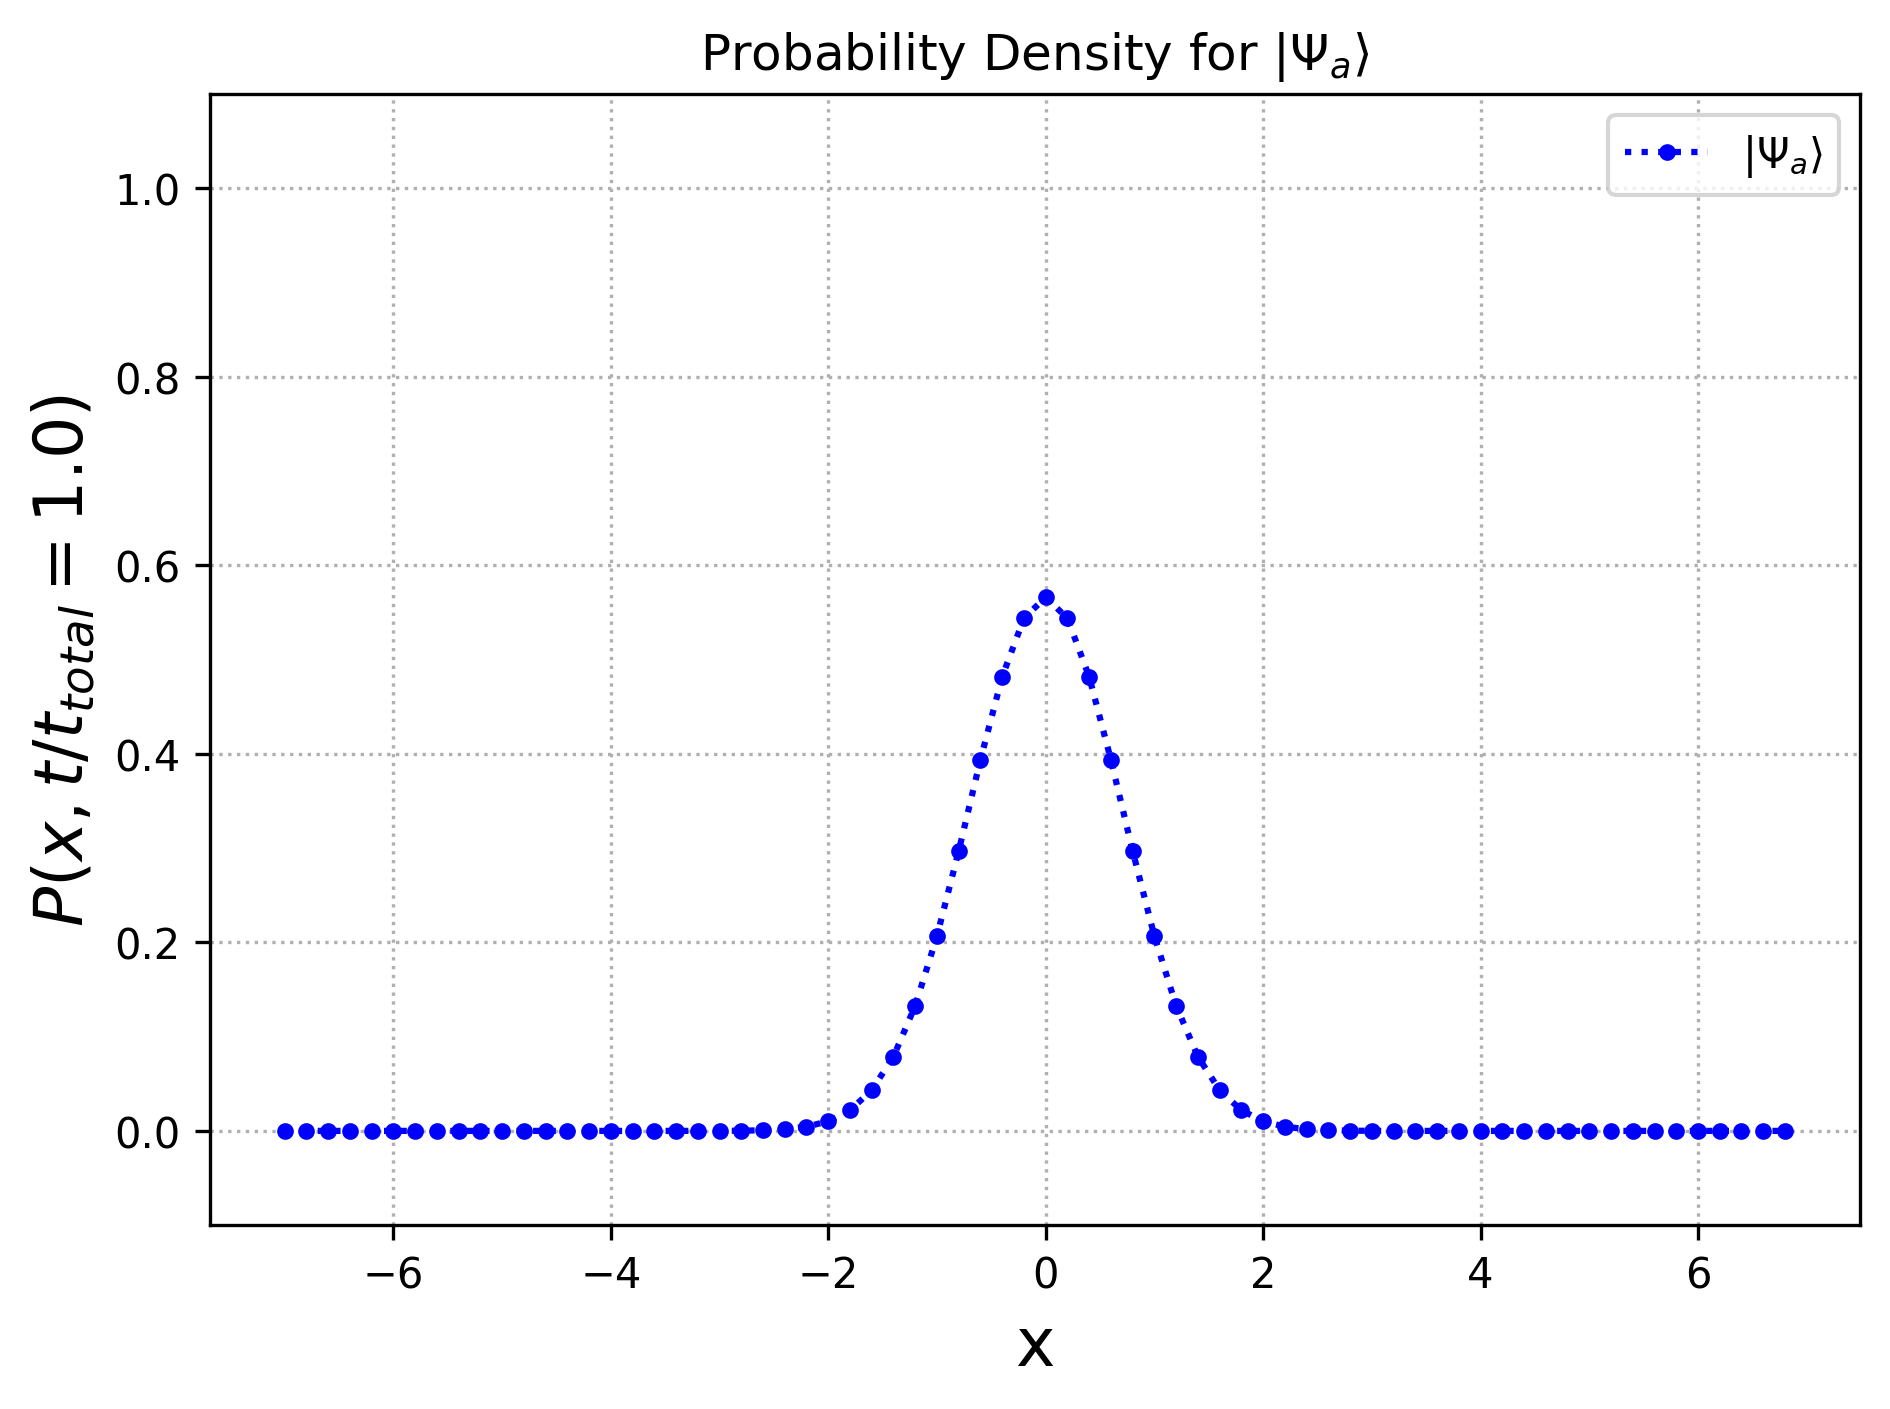

In [ ]:
# Ploting |Ψ_a⟩
fotos = len(t)//100 # number of pictures to be plotted for video
t_plot = np.arange(t_ini, t_end, dt)
plot_adonai = np.arange(0, len(t_plot), fotos)
print(len(plot_adonai), fotos)
fig, ax = plt.subplots(dpi=300)
plt.xlabel('x', fontsize = 16)
plt.ylim(-0.1,1.1)
plt.grid(linestyle = ':')
plt.title(r"Probability Density for $|\Psi_a\rangle$")
plt.ylabel(r'$P\left(x,t\in [0,t_{end})\right)$', fontsize = 16)
line, = ax.plot(x, Pa[:,0],'.:', color='blue', label = r'$|\Psi_a\rangle$')
plt.tight_layout()
plt.legend(loc='upper right')
def animate(i):
    yname = r'$P(x,t/t_{total}=$'+str(round((t_plot[i*fotos]+dt)/t_end,1))+')'
    line.set_ydata(Pa[:,i*fotos])
    ax.set_ylabel(yname)
    return line,
ani = animation.FuncAnimation(fig, animate, interval=200, blit=True, frames=len(plot_adonai))
ani.save('Psi_a.gif')

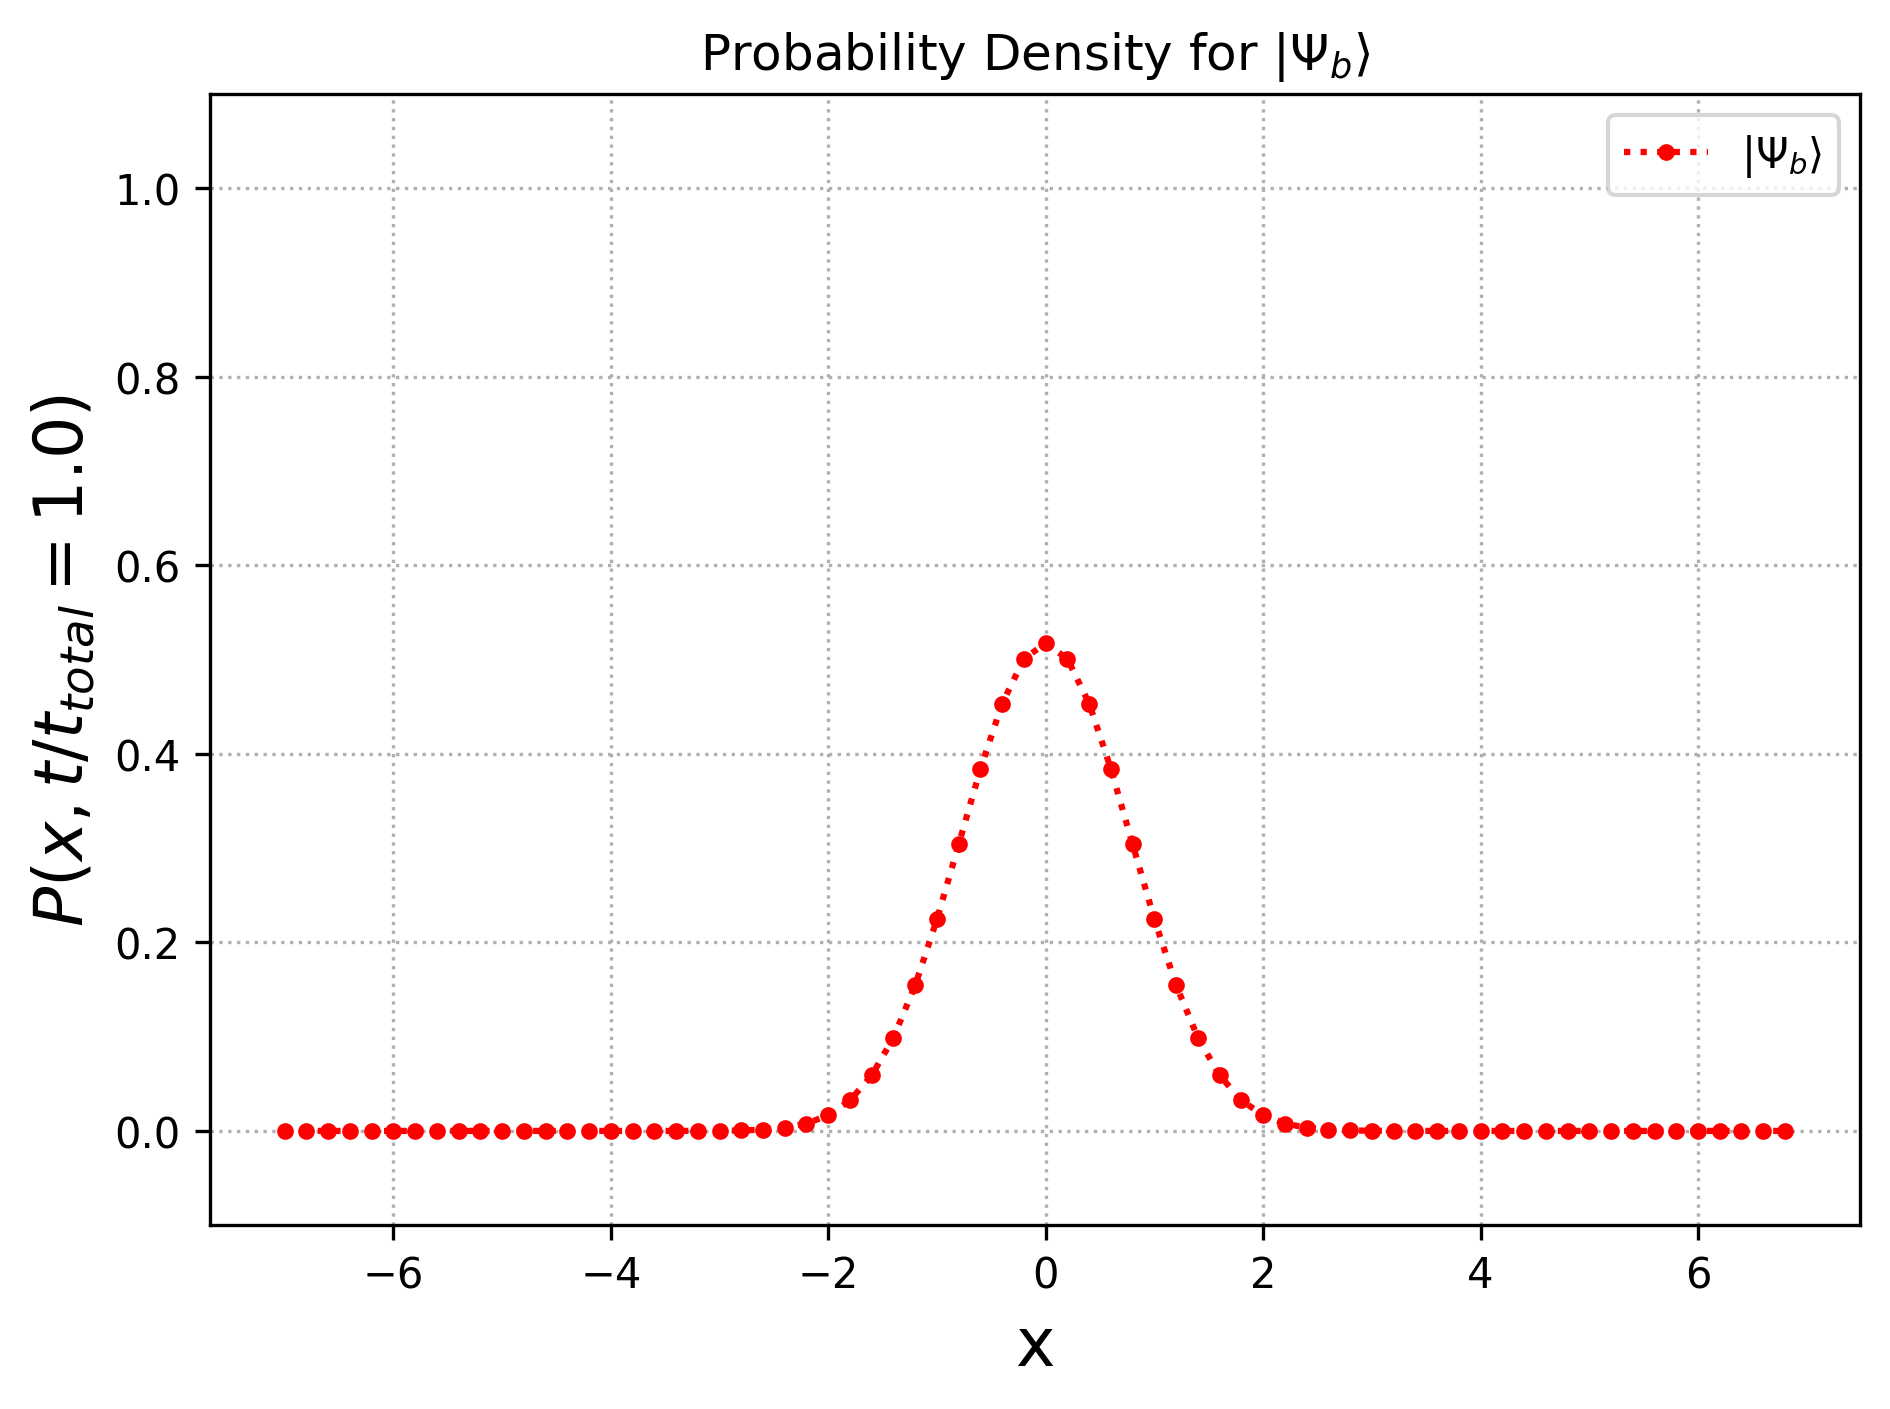

In [ ]:
# Ploting |Ψ_b⟩
fotos = len(t)//100 # number of pictures to be plotted for video
t_plot = np.arange(t_ini, t_end, dt)
plot_adonai = np.arange(0, len(t_plot), fotos)
fig, ax = plt.subplots(dpi=300)
plt.xlabel('x', fontsize = 16)
plt.ylim(-0.1,1.1)
plt.grid(linestyle = ':')
plt.ylabel(r'$P\left(x,t\in [0,t_{end})\right)$', fontsize = 16)
plt.title(r"Probability Density for $|\Psi_b\rangle$")
line, = ax.plot(x, Pb[:,0],'.:', color='red', label = r'$|\Psi_b\rangle$')
plt.tight_layout()
plt.legend(loc='upper right')
def animate(i):
    yname = r'$P(x,t/t_{total}=$'+str(round((t_plot[i*fotos]+dt)/t_end,1))+')'
    line.set_ydata(Pb[:,i*fotos])
    ax.set_ylabel(yname)
    return line,
ani = animation.FuncAnimation(fig, animate, interval=200, blit=True, frames=len(plot_adonai))
ani.save('Psi_b.gif')

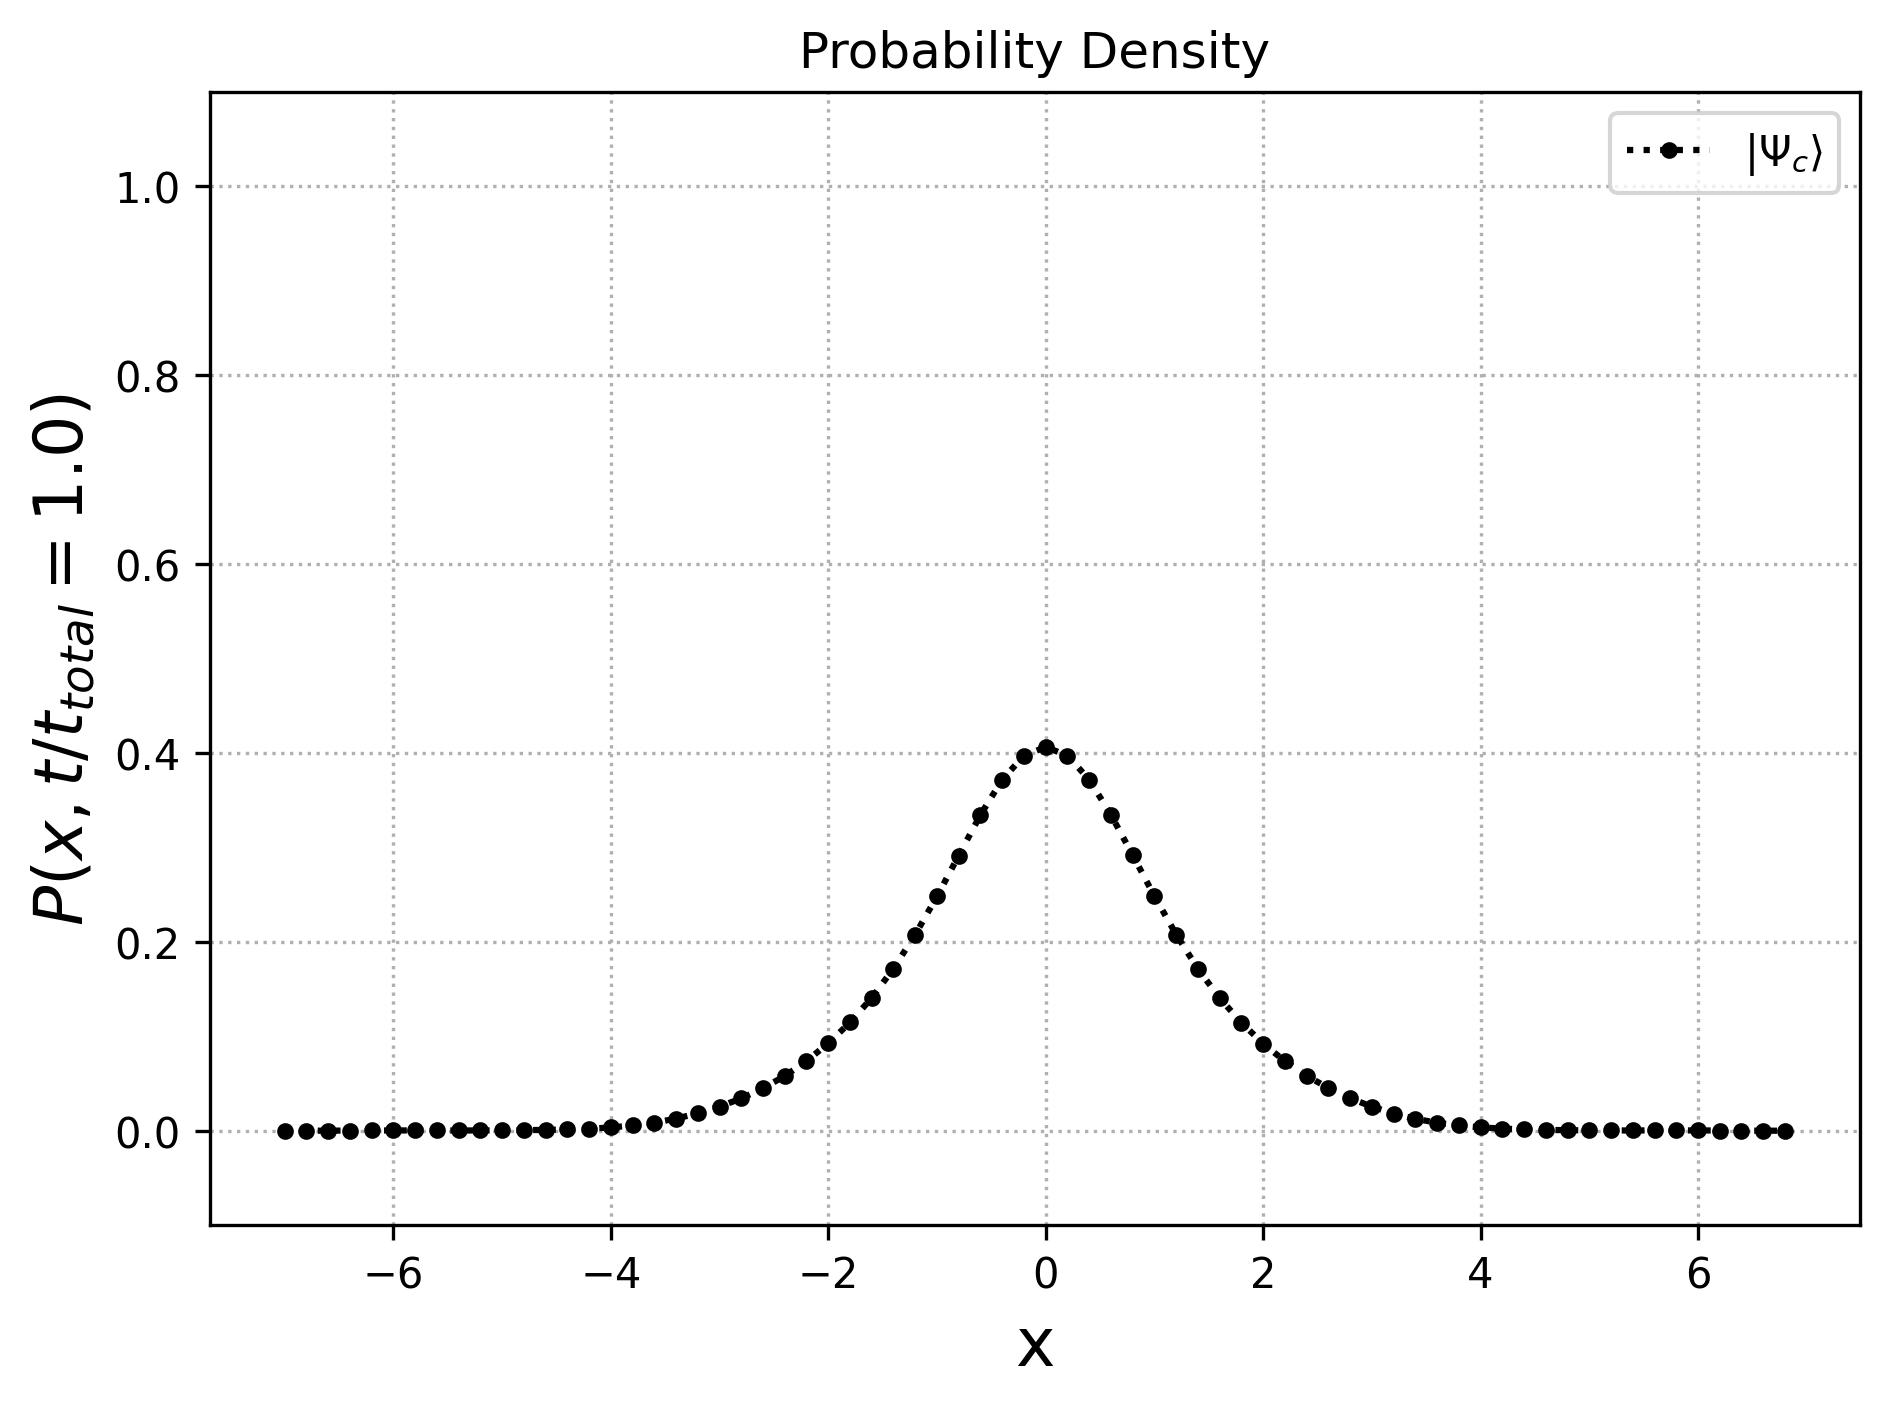

In [ ]:
# Ploting |Ψ_c⟩
fotos = len(t)//100 # number of pictures to be plotted for video
t_plot = np.arange(t_ini, t_end, dt)
plot_adonai = np.arange(0, len(t_plot), fotos)
fig, ax = plt.subplots(dpi=300)
plt.xlabel('x', fontsize = 16)
plt.ylabel(r'$P\left(x,t\in [0,t_{end})\right)$', fontsize = 16)
plt.ylim(-0.1,1.1)
plt.grid(linestyle = ':')
plt.title(r"Probability Density for $|\Psi_c\rangle$")
line, = ax.plot(x, Pc[:,0],'k.:', label = r'$|\Psi_c\rangle$')
plt.tight_layout()
plt.legend(loc='upper right')
def animate(i):
    yname = r'$P(x,t/t_{total}=$'+str(round((t_plot[i*fotos]+dt)/t_end,1))+')'
    line.set_ydata(Pc[:,i*fotos])
    ax.set_ylabel(yname)
    return line,
ani = animation.FuncAnimation(fig, animate, interval=200, blit=True, frames=len(plot_adonai))
ani.save('Psi_c.gif')